# Linear Regression : Data Analytics Project

---


In [0]:
# First, imports.

from datascience import *
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
matplotlib.use("Agg", warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### 1. 
Develop a question of your choice that can be addressed by identifying, collecting, and analyzing relevant data. You need find relevant data by yourself, and describe the data such as the source, attributes, size, how the data were collected, is the dataset sample data or population data?, etc. The dataset should have at least six distinct variables (i.e. columns) and a sample size (i.e. rows) of 500 or more. (3 points)


---
I found a summary of weather data taken from many weather stations during WWII [on Kaggle](https://www.kaggle.com/smid80/weatherww2). This is a very thorough dataset, and has many thousands of rows and over 30 columns (see below for printout). Originally, this was NOAA weather data that was compiled onto Kaggle. The many data points available include weather station, precipitation, max, min, and mean temperature, snowfall, a Boolean value for whether the weather was poor or not, year, month, day, and many others. The dataset is population data - all the weather data collected over the relevant time period.

The columns I'll be focusing on are minimum daily temperature and maximum daily temperature, with an eye toward answering the question **"Can we predict maximum daily temperature from minimum daily temperature?"**


In [0]:
weather_all = pd.read_csv('WeatherSum.csv')
weather_all.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
print(len(weather_all.columns),"columns")
print(weather_all.shape[0], "rows")

31 columns
119040 rows


### 2. 
Perform exploratory data analysis (EDA). Describe the EDA process and result with at least four data visualizations. Explain whether the data is sufficient to answer the question you developed based on EDA result. If it is not sufficient, how did you address the issue? (3 points)

In [0]:
# Filtering our dataset down to the relevant columns. 
# Including "month" so we have some context for different minimums and maximums

temp = weather_all.filter(['MinTemp','MaxTemp', 'MeanTemp', 'MO'], axis=1)
temp = temp.rename(columns={'MO': 'Month'})
temp

,MinTemp,MaxTemp,MeanTemp,Month
0,22.222222,25.555556,23.888889,7
1,21.666667,28.888889,25.555556,7
2,22.222222,26.111111,24.444444,7
3,22.222222,26.666667,24.444444,7
4,21.666667,26.666667,24.444444,7
...,...,...,...,...
119035,18.333333,28.333333,23.333333,12
119036,18.333333,29.444444,23.888889,12
119037,18.333333,28.333333,23.333333,12
119038,18.333333,28.333333,23.333333,12


In [0]:
# Since these temperature data ARE on the same scale, and Month is ordinal, I don't necessarily need to standardize them.
# Let's look at some statistics

temp.describe()

,MinTemp,MaxTemp,MeanTemp,Month
count,119040.000000,119040.000000,119040.000000,119040.000000
mean,17.789511,27.045111,22.411631,6.726016
std,8.334572,8.717817,8.297982,3.425561
min,-38.333333,-33.333333,-35.555556,1.000000
25%,15.000000,25.555556,20.555556,4.000000
50%,21.111111,29.444444,25.555556,7.000000
75%,23.333333,31.666667,27.222222,10.000000
max,34.444444,50.000000,40.000000,12.000000


The mean of "month" being 6.72 indicates that we have slightly more data from the second half of the year than we do from the first. 

We see that the temperature extremes range from -33 degrees Celsius to 50 degrees Celsius - a huge range that makes sense when you think about the range that can be found over a large landmass and across a 12-month year.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


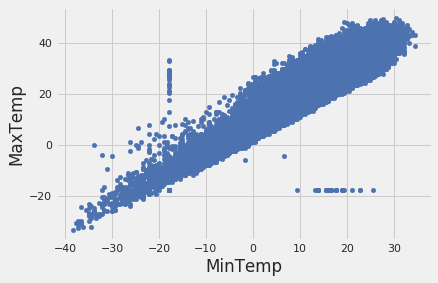

In [0]:
# Let's see if Min and Max temperatures have the strong linear relationship we would assume they do.

temp.plot.scatter('MinTemp', 'MaxTemp')

This is more or less as expected, but the outliers protruding in two straight lines from the main body of the plot are interesting. Could it be possible that the minimum temperature on several days is 20 Celsius, but the MAXIMUM temperature is somewhere around -19? This makes no sense by definition, even if these two temperatures did occur at opposite times of the day as usual; these data points might have to be taken out via cleaning, and with over 100K values, I think this would leave plenty of data for an analysis. 

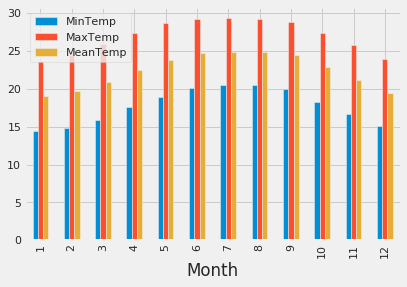

In [0]:
# Overall, however, we see the distribution we expect to see (min, max, and thus mean temperatures
# increasing in the spring and summer months and dipping again in fall and winter)

temp.groupby('Month').mean().plot.bar()

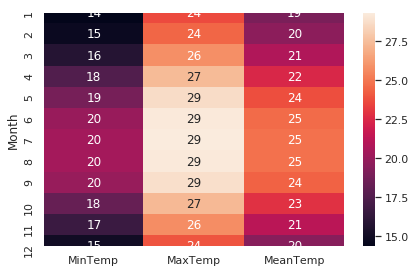

In [0]:
# We can also visualize these relationships with a heatmap.

sns.set()
sns.heatmap(temp.groupby('Month').mean(), annot=True)

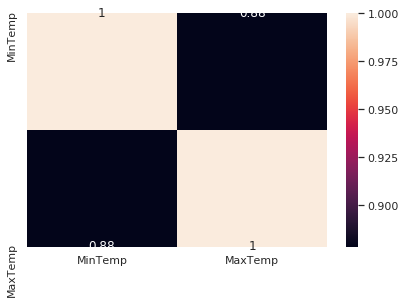

In [0]:
# What about the correlations between values? 

corr = temp.filter(['MinTemp', 'MaxTemp'], axis=1).corr()
sns.heatmap(corr,             
            xticklabels=corr.columns.values,            
            yticklabels=corr.columns.values,
            annot=True)

This is consistent with the relationships seen in the scatterplot: there is a .88 correlation between minimum and maximum temperature. 


---



I believe that this data is more than sufficient to use with a linear regression that allows us to predict maximum daily temperature given minimum daily temperature, and vice versa. The relationship is clear and strong, and outliers are minimal. Those can be cleaned in the next step, and we will still have plenty of clear data left with which to run an analysis.



---
### 3. 
Describe any data cleaning or transformations that you perform and why they are motivated by your EDA? (2 point)




In [0]:
# Let's check to see if we have any NaN values in our dataset

temp.isnull().values.any()

False

In [0]:
# Great! What about those values we saw earlier, in those strange lines in our scatter plot?
# We can use SciPy to detect outliers.

from scipy import stats
temp[~(np.abs(stats.zscore(temp)) < 3).all(axis=1)]

# It seems that the anomalous value is -17.7777. 

temp.loc[np.isclose(temp['MinTemp'],-17.7777777778)]

,MinTemp,MaxTemp,MeanTemp,Month
10116,-17.777778,-17.777778,-17.777778,10
10117,-17.777778,-17.777778,-17.777778,10
10118,-17.777778,-17.777778,-17.777778,10
10119,-17.777778,-17.777778,-17.777778,10
10120,-17.777778,-17.777778,-17.777778,10
...,...,...,...,...
111273,-17.777778,-17.777778,-17.777778,8
111278,-17.777778,-17.777778,-17.777778,8
111279,-17.777778,-17.777778,-17.777778,8
113916,-17.777778,29.444444,24.444444,6


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


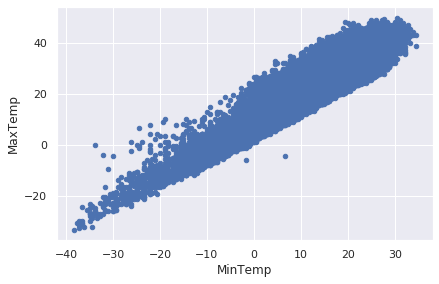

In [0]:
# That looks about right; the consistent -17.77778 values are a giveaway that these are the 
# outliers we are looking for. There are about 500 of these. 

# Let's reassign temp to exclude these.

temp = temp.loc[~np.isclose(temp['MinTemp'],-17.7777777778)]
temp = temp.loc[~np.isclose(temp['MaxTemp'],-17.7777777778)]
temp.plot.scatter('MinTemp', 'MaxTemp')

In [0]:
temp

,MinTemp,MaxTemp,MeanTemp,Month
0,22.222222,25.555556,23.888889,7
1,21.666667,28.888889,25.555556,7
2,22.222222,26.111111,24.444444,7
3,22.222222,26.666667,24.444444,7
4,21.666667,26.666667,24.444444,7
...,...,...,...,...
119035,18.333333,28.333333,23.333333,12
119036,18.333333,29.444444,23.888889,12
119037,18.333333,28.333333,23.333333,12
119038,18.333333,28.333333,23.333333,12


Much better!

As you can see, I detected outliers visually using a scatterplot, and then used a location function to remove the strange datapoints that were all located at -17.7778 (who knows why this number was seen so frequently - was it a broken instrument?) 


---

### 4. 
Apply relevant inference or predication methods such as linear regression or K-nearest neighborhood (KNN) to analyze your processed data, and validate the analysis results using cross-validation. Explain the training process, and the loss functions used in the analysis. Using examples (i.e. the values of the loss functions) to explain how the minimal value(s) of the loss function is/are found. (7 points)

In [0]:
# Since my dataset is comprised of continuous quantitative data, I'll use a linear regression analysis
# to predict maximum daily values from minimum. 

# Let's use SciKit Learn's linear regression model for this task.
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# First we need to create our "source" - what we will use to predict
# the "target" values, or maximum daily temperatures. With these we 
# can train our model.
temp = temp.reset_index()
source = temp.filter(['MinTemp'])
target = temp.filter(['MaxTemp'])

Now we can divide our source and our target into testing and training sets. For this example we'll use a 50/50 split.

In [0]:
# Defining our train/test split

X_train, X_test, y_train, y_test = train_test_split(source, target, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(94799, 1) (94799, 1)
(23700, 1) (23700, 1)


Now we can create a linear model and fit this data to it.

In [0]:
# Finally, we can train and test our model.
lm = linear_model.LinearRegression()
# Train the model using the training sets
model = lm.fit(X_train, y_train)
# And predict!
predictions = lm.predict(X_test)

In [0]:
predictions[0:5]

array([[32.07895175],
       [19.12474739],
       [23.11065643],
       [32.57719039],
       [28.59128135]])

In [0]:
# This returns the R-value, a measure of how much variance of the data is explained by our model.
print('Coefficient:', model.coef_)

Coefficient: [[0.89682953]]


That's not bad at all! A correlation of .89 is considered to be quite strong.


In [0]:
# This calculates the mean squared error, the simplest measure of measuring loss.
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))

Mean squared error: 16.22


I chose to use the simple method of mean squared error to calculate loss; while it is simple, it's still 

In [0]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

Variance score: 0.76


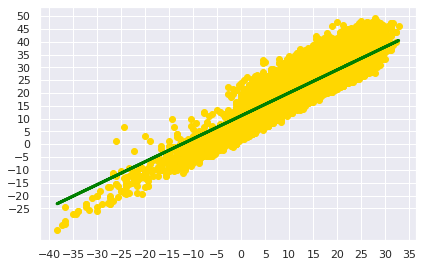

In [0]:
# Plotting the results of my predictions.

plt.scatter(X_test, y_test,  color='gold')
plt.plot(X_test, predictions, color='green', linewidth=3)

plt.xticks((np.arange(-40, 40, 5)))
plt.yticks((np.arange(-25, 55, 5)))

plt.show()

In [0]:
print("Score:", model.score(X_test, y_test))

Score: 0.7573275276653522


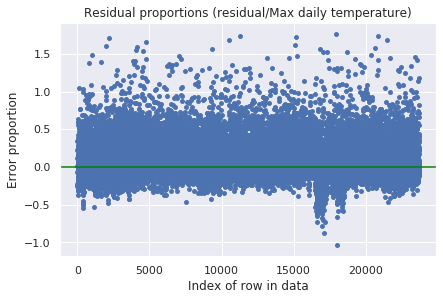

In [0]:
target_test = target[:23700]

resid = target_test - predictions
resid_prop = resid / target_test
plt.scatter(np.arange(len(resid_prop)), resid_prop, s=15)
plt.axhline(0, c='green')
plt.title('Residual proportions (residual/Max daily temperature)')
plt.xlabel('Index of row in data')
plt.ylabel('Error proportion');

This seems to be a pretty good model, but let's account for any potential lack of randomness (for example, if our dataset and therefore our train/test split is not randomly distributed) with cross-validation. I'll use k-folds cross validation because of the very large size of this dataset.

In [0]:
from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=6) # Define the split - into 2 folds 
kf.get_n_splits(source) # returns the number of splitting iterations in the cross-validator
 
KFold(n_splits=6, random_state=None, shuffle=False)

for train_index, test_index in kf.split(source.index):
  print('TRAIN:', train_index, 'TEST:', test_index)
  X_train, X_test = source[train_index[0]:train_index[-1]], source[test_index[0]:test_index[-1]]
  y_train, y_test = target[train_index[0]:train_index[-1]], target[test_index[0]:test_index[-1]]

TRAIN: [ 19750  19751  19752 ... 118496 118497 118498] TEST: [    0     1     2 ... 19747 19748 19749]
TRAIN: [     0      1      2 ... 118496 118497 118498] TEST: [19750 19751 19752 ... 39497 39498 39499]
TRAIN: [     0      1      2 ... 118496 118497 118498] TEST: [39500 39501 39502 ... 59247 59248 59249]
TRAIN: [     0      1      2 ... 118496 118497 118498] TEST: [59250 59251 59252 ... 78997 78998 78999]
TRAIN: [     0      1      2 ... 118496 118497 118498] TEST: [79000 79001 79002 ... 98747 98748 98749]
TRAIN: [    0     1     2 ... 98747 98748 98749] TEST: [ 98750  98751  98752 ... 118496 118497 118498]


In [0]:
# Necessary imports: 

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(model, source, target, cv=6)
print('Cross-validated scores:', scores)

Cross-validated scores: [-0.19228693  0.31670301  0.75150735  0.0877867   0.74139534 -0.11795704]


We can see above that cross-validation allowed us to have a score of .75, which is actually WORSE than our previous 80/20 split! It seems that we originally created the best model we possibly could.

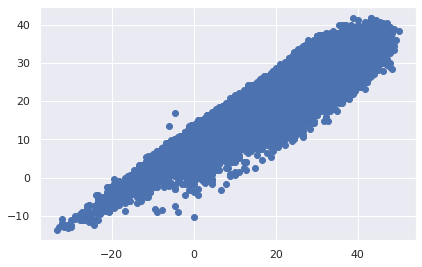

In [0]:
# Graphing the cross-validated data.

predictions = cross_val_predict(model, source, target, cv=6)
plt.scatter(target, predictions)

We can now return to our original model and find the slope of it.

In [0]:
# We can calculate the slope of our model using a simple rise/run calculation.
# Unfortunately the sklearn LinearRegression object doesn't have this method!

find_slope = make_array(-15, 0)
find_slope = find_slope.reshape(-1, 1)
intercepts = model.predict(find_slope)
intercepts

array([[-2.29951367],
       [11.15292933]])

In [0]:
regression_slope = (np.abs(intercepts[0]) + np.abs(intercepts[1]))/(15)
print("The slope of our regression line is",np.round(regression_slope, 2))

The slope of our regression line is [0.9]


In [0]:
# We can use an example in our textbook to see whether the slope of our regression line is within the 95% confidence
# interval of bootstrapped slopes.

# Let's import some functions first.

def correlation(t, label_x, label_y):
    return np.mean(stats.zscore(t.column(label_x))*stats.zscore(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))
  

Slope of regression line: [0.89682953]
Approximate 95%-confidence interval for the true slope:
0.8830234380624677 0.908025746224484


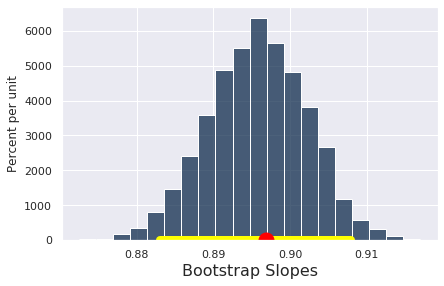

In [0]:
# Now we can bootstrap our slopes using DataScience functions. 

slopes = make_array()
temp_ds = Table.from_df(temp) # Switching from pandas to DataScience



for i in np.arange(5000):
    bootstrap_sample = temp_ds.sample(10000)
    bootstrap_slope = slope(bootstrap_sample, 'MinTemp', 'MaxTemp')
    slopes = np.append(slopes, bootstrap_slope)
Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)

# Defining our confidence interval upper and lower bounds
left = percentile(2.5, slopes)
right = percentile(97.5, slopes)


plt.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
plt.plot(regression_slope, 0, marker='o', markersize=15, color="red")
print('Slope of regression line:', regression_slope)
print('Approximate 95%-confidence interval for the true slope:')
print(left, right)

Our regression slope is well inside the distribution of bootstrapped slopes, and so it seems fairly close to a possible true slope! Overall, this seems like a solid linear model and a fairly predictive one.

### MSE is 16.22
### Variance is .76

This is a good model, but we can also calculate the minimum squared error:

In [0]:
# Creating an MSE loss function:
def mse_loss(theta, y_vals):
    return np.mean((y_vals - theta) ** 2)

mse_loss(26, target) # Doing a sample call of the function

MaxTemp    69.220476
dtype: float64

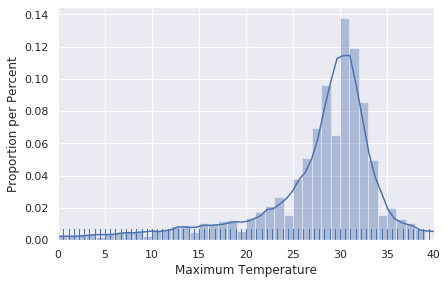

In [0]:
sns.distplot(target, bins=np.arange(40), rug=True)
plt.xlim(0, 40)
plt.xlabel('Maximum Temperature')
plt.ylabel('Proportion per Percent');

# It seems from this plot that theta should be around 30-31, but let's calculate it.

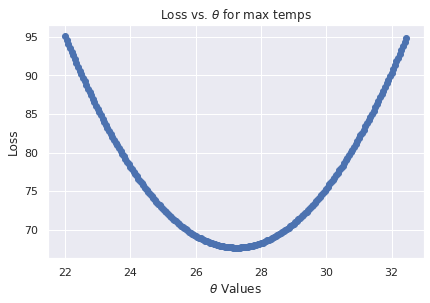

In [0]:
thetas = np.arange(22, 32.5, 0.05)
losses = [mse_loss(theta, target) for theta in thetas]

plt.scatter(thetas, losses)
plt.title(r'Loss vs. $ \theta $ for max temps')
plt.xlabel(r'$ \theta $ Values')
plt.ylabel('Loss');

It seems that the best theta value would be a little bit above 27. To get this value specifically (and without calculus), let's just take the average of the target values:

In [0]:
theta = np.mean(target)
print("The best value of theta, that minimizes loss, is", np.round(theta[0],2))

The best value of theta, that minimizes loss, is 27.24


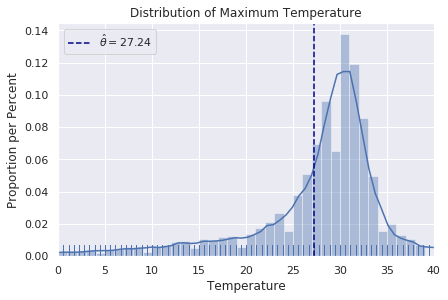

In [0]:
# Plot with our value of theta - it isn't at the peak of the distribution, as originally guessed.

sns.distplot(target, bins=np.arange(40), rug=True)

plt.axvline(x=27.24, c='darkblue', linestyle='--', label=r'$ \hat \theta = 27.24$')
plt.legend()

plt.xlim(0, 40)
plt.title('Distribution of Maximum Temperature')
plt.xlabel('Temperature')
plt.ylabel('Proportion per Percent');

### 5. 
I think that, overall, I took a pretty solid approach to this problem, using cross-validation and a good test/train split to make our linear model the best it can be.

The MSE (mean square of errors) loss function, and hence the minimization of loss, is the simplest possible model for calculating and minimizing loss.

## Bonus visualization:
I thought it was pretty.

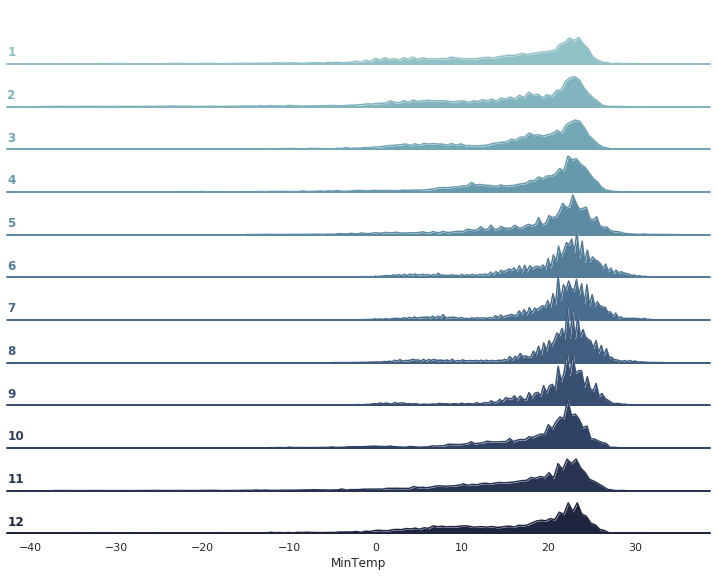

In [0]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(12, rot=-.25, light=.7)
g = sns.FacetGrid(temp[['Month', 'MinTemp']], row="Month", hue="Month", aspect=15, height=.7, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "MinTemp", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
#g.map(sns.kdeplot, "MinTemp", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "MinTemp")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)